In [ ]:
# Library for dataset upload
import pandas as pd

In [ ]:
# for getting accss of gdrive file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import your dataframe
df = pd.read_csv('/content/price.csv')

In [ ]:
#set date as index for graph
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format = True)

In [ ]:
#library for graph
import matplotlib as mpl
import matplotlib.pyplot as plt

array([<Axes: xlabel='Date'>], dtype=object)

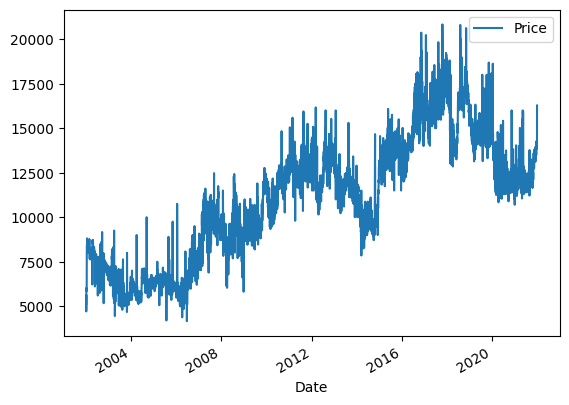

In [ ]:
df.set_index('Date')[['Price']].plot(subplots = True)

In [ ]:
df1= df['Price']

In [ ]:
import numpy as np
df1

0        5124.0
1        5628.3
2        4710.0
3        4940.0
4        6021.7
         ...   
6758    14037.8
6759    14050.3
6760    14033.8
6761    14025.2
6762    16275.0
Name: Price, Length: 6763, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.0576645 ]
 [0.08792171]
 [0.03282515]
 ...
 [0.5922386 ]
 [0.59172262]
 [0.72670711]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(5748, 1015)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(5717, 30)
(5717,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(984, 30)
(984,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for Stacked LSTM model
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 248       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


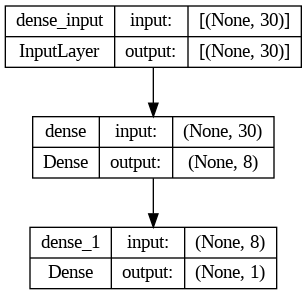

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
179/179 [==============================] - 2s 6ms/step - loss: 0.0458 - val_loss: 0.0059
Epoch 2/20
179/179 [==============================] - 1s 3ms/step - loss: 0.0250 - val_loss: 0.0042
Epoch 3/20
179/179 [==============================] - 1s 4ms/step - loss: 0.0100 - val_loss: 0.0030
Epoch 4/20
179/179 [==============================] - 1s 3ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 5/20
179/179 [==============================] - 1s 5ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 6/20
179/179 [==============================] - 1s 3ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 7/20
179/179 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 8/20
179/179 [==============================] - 1s 7ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 9/20
179/179 [==============================] - 1s 7ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 10/20
179/179 [==============================] - 2s 9ms/step - loss: 0.0019 - val_loss: 0.0027

In [ ]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.045766,0.005921
1,0.025030,0.004218
2,0.010000,0.002993
3,0.004151,0.002762
4,0.002550,0.002774
5,0.002199,0.002776
6,0.002064,0.002790
7,0.001991,0.002685
8,0.001948,0.002631
9,0.001895,0.002674


<Axes: >

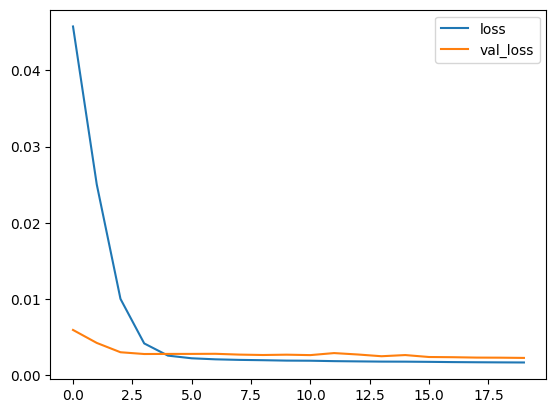

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [ ]:
import tensorflow as tf

In [ ]:
# prediction and check performance
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

31/31 [==============================] - 0s 2ms/step


In [ ]:
# reverseTransformation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# RMSE of train test
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11337.597636910137

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

13169.16468375364

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the actual and predicted values
y_true = y_train.tolist()
y_pred = train_predict.tolist()

# Calculate R-squared (r2score)
r2score = r2_score(y_true, y_pred)
print("R-squared (r2score):", r2score)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
# mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (r2score): -2935991657.939331
Root Mean Squared Error (RMSE): 11337.597636910137
Mean Absolute Error (MAE): 10831.84631580676


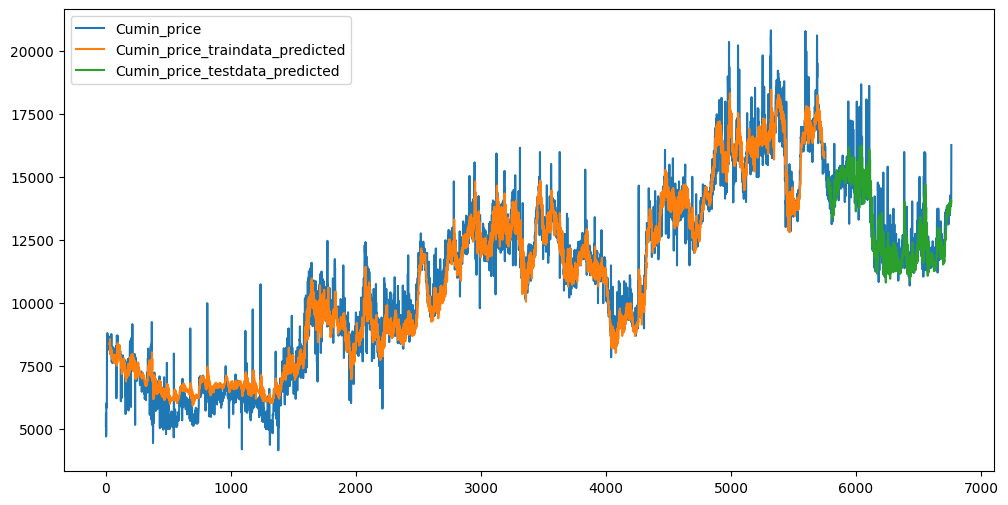

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=30
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label = 'Cumin_price')
plt.plot(trainPredictPlot, label = 'Cumin_price_traindata_predicted')
plt.plot(testPredictPlot, label = 'Cumin_price_testdata_predicted')
plt.legend()
plt.show()

In [ ]:
#printing the testing predicted data
test_predict

array([[14575.954 ],
       [14974.734 ],
       [14737.366 ],
       [14685.647 ],
       [14510.917 ],
       [14802.087 ],
       [14924.032 ],
       [14793.8545],
       [14475.535 ],
       [14374.56  ],
       [14485.21  ],
       [14787.862 ],
       [14633.347 ],
       [14345.114 ],
       [14175.147 ],
       [14129.63  ],
       [14339.311 ],
       [14494.847 ],
       [14596.729 ],
       [14431.371 ],
       [14123.982 ],
       [13961.936 ],
       [14132.798 ],
       [13952.278 ],
       [13933.371 ],
       [13834.309 ],
       [14097.751 ],
       [13984.232 ],
       [13935.29  ],
       [13612.897 ],
       [13347.959 ],
       [13603.362 ],
       [13667.009 ],
       [13817.233 ],
       [13399.351 ],
       [13491.942 ],
       [13524.432 ],
       [14061.929 ],
       [13703.055 ],
       [13692.489 ],
       [13609.418 ],
       [13892.253 ],
       [13990.658 ],
       [13496.539 ],
       [13693.106 ],
       [13662.216 ],
       [14101.881 ],
       [14151

In [ ]:
len(test_data)

1015

In [ ]:
x_input=test_data[985:].reshape(1,-1)
x_input.shape

(1, 30)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.566439272578913,
 0.571155149966101,
 0.5707891594818535,
 0.5631333585326782,
 0.5692052006647828,
 0.5652753028421261,
 0.5377120194874934,
 0.5844448044350847,
 0.582314859813645,
 0.5860167635641474,
 0.5815348800931176,
 0.5884107013217657,
 0.559029465233904,
 0.5810968914808216,
 0.5859087663720743,
 0.5750850477887576,
 0.5744790635443479,
 0.5694691938009612,
 0.560001439962561,
 0.5903486509350757,
 0.5886206958619077,
 0.6068482219462294,
 0.5942785487577323,
 0.5912726269117005,
 0.5805269063004362,
 0.5924785955565156,
 0.5932285760570225,
 0.5922386017963533,
 0.5917226152120046,
 0.7267071056152541]

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lstm_output=[]
n_steps=30
i=0
while(i<365):

    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lstm_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lstm_output.extend(yhat.tolist())
        i=i+1
print(lstm_output)

[0.62096065]
31
1 day input [0.57115515 0.57078916 0.56313336 0.5692052  0.5652753  0.53771202
 0.5844448  0.58231486 0.58601676 0.58153488 0.5884107  0.55902947
 0.58109689 0.58590877 0.57508505 0.57447906 0.56946919 0.56000144
 0.59034865 0.5886207  0.60684822 0.59427855 0.59127263 0.58052691
 0.5924786  0.59322858 0.5922386  0.59172262 0.72670711 0.62096065]
1 day output [[0.60923666]]
2 day input [0.57078916 0.56313336 0.5692052  0.5652753  0.53771202 0.5844448
 0.58231486 0.58601676 0.58153488 0.5884107  0.55902947 0.58109689
 0.58590877 0.57508505 0.57447906 0.56946919 0.56000144 0.59034865
 0.5886207  0.60684822 0.59427855 0.59127263 0.58052691 0.5924786
 0.59322858 0.5922386  0.59172262 0.72670711 0.62096065 0.60923666]
2 day output [[0.6403417]]
3 day input [0.56313336 0.5692052  0.5652753  0.53771202 0.5844448  0.58231486
 0.58601676 0.58153488 0.5884107  0.55902947 0.58109689 0.58590877
 0.57508505 0.57447906 0.56946919 0.56000144 0.59034865 0.5886207
 0.60684822 0.59427855 

In [ ]:
lstm_output1 = scaler.inverse_transform(lstm_output)

In [ ]:
lstm_output1

array([[14512.51329675],
       [14317.10829621],
       [14835.53913346],
       [14497.34848744],
       [14289.13312226],
       [14284.27025023],
       [14781.15046785],
       [14831.64585552],
       [14516.70659254],
       [14444.10624764],
       [14804.16938673],
       [14788.50487882],
       [14637.08130232],
       [14886.00769834],
       [15023.1297619 ],
       [14974.78317755],
       [14914.04247848],
       [14687.88266845],
       [15130.80239164],
       [14793.62803124],
       [14965.66044948],
       [15162.24565268],
       [15094.84694169],
       [15303.08118216],
       [14936.15637664],
       [14942.83723761],
       [15118.88413305],
       [15047.10436677],
       [15246.89737666],
       [15225.81764598],
       [15336.42886111],
       [15322.6469155 ],
       [15223.62215115],
       [15256.95691542],
       [15359.34247571],
       [15442.54775604],
       [15345.02010061],
       [15487.18584166],
       [15449.47995646],
       [15465.99484608],


In [ ]:
day_new1=np.arange(1,366)
day_pred1=np.arange(366,731)

In [ ]:
day_raw=np.arange(1,6763)
day_train=np.arange(31,5748)
day_test=np.arange(5749,6733)
day_pred=np.arange(6764,7129)

In [ ]:
import matplotlib.pyplot as plt

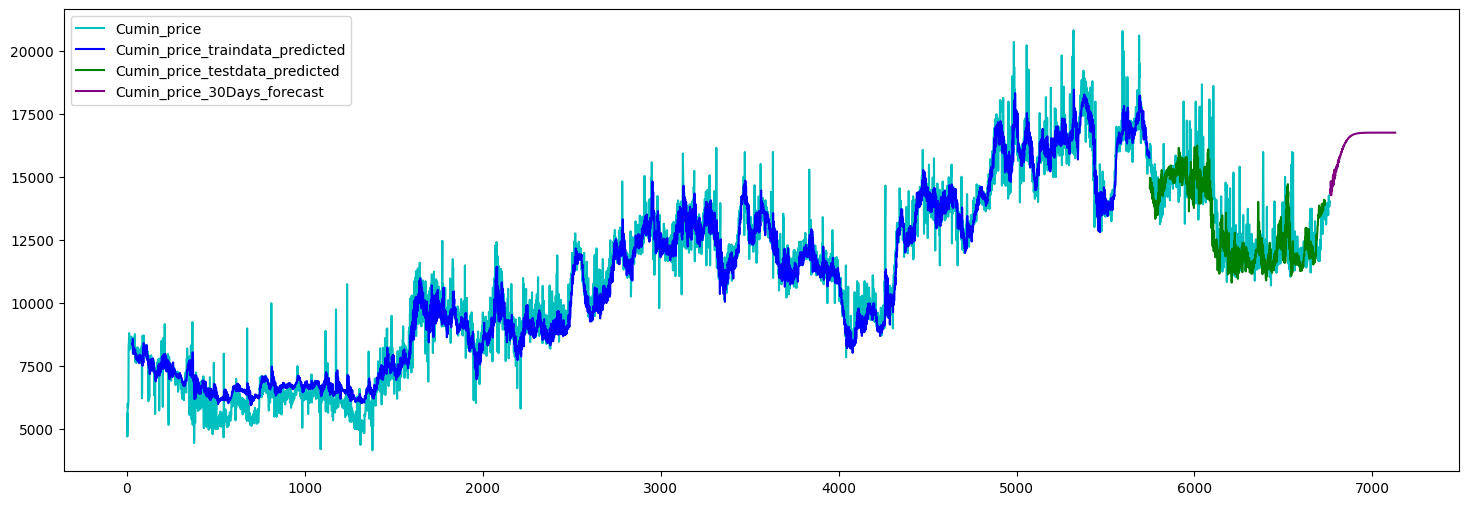

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(day_raw,scaler.inverse_transform(df1[:-1]), color = 'c', label = 'Cumin_price')
plt.plot(day_train,train_predict, color = 'blue', label = 'Cumin_price_traindata_predicted')
plt.plot(day_test,test_predict, color = 'green', label = 'Cumin_price_testdata_predicted')
plt.plot(day_pred,scaler.inverse_transform(lstm_output), color = 'purple', label = 'Cumin_price_30Days_forecast')
plt.legend()
plt.show()

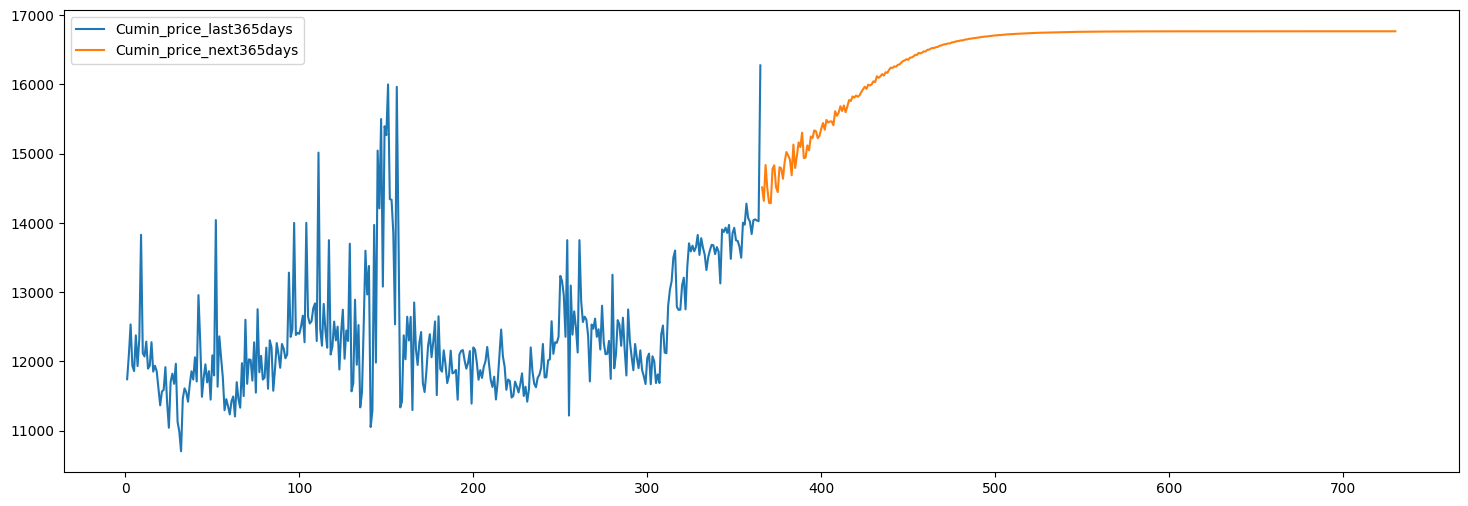

In [ ]:
#plotting the graph showing forecast
plt.figure(figsize=(18, 6))
plt.plot(day_new1,scaler.inverse_transform(df1[6398:]), label = 'Cumin_price_last365days')
plt.plot(day_pred1,lstm_output1, label = 'Cumin_price_next365days')
plt.legend()
plt.show()